In [1]:
import matplotlib.pyplot as plt  
# iscrtavanje slika i plotova unutar samog browsera
%matplotlib inline 

import matplotlib.pylab as pylab
# prikaz vecih slika 
pylab.rcParams['figure.figsize'] = 24,24

import cv2
import numpy as np

In [2]:
def add_template(templates_dict, point, search_duplicates_points = 4, print_info = False):
    '''Add the template if a template with the x and y around the certain point has NOT been added to the dictionary.'''
    for i in range(0,search_duplicates_points):
        if (templates_dict.has_key(point[0] + i)):
            for j in range(0,search_duplicates_points):
                if (templates_dict[point[0] + i] == point[1] + j):
                    if print_info:
                        print point[0], 'already here'
                    return False
                if (templates_dict[point[0] + i] == point[1] - j):
                    if print_info:
                        print point[0], 'already here'
                    return False
        if (templates_dict.has_key(point[0] - i)):
            for j in range(0,search_duplicates_points):
                if (templates_dict[point[0] - i] == point[1] + j):
                    if print_info:
                        print point[0], 'already here'
                    return False
                if (templates_dict[point[0] - i] == point[1] - j):
                    if print_info:
                        print point[0], 'already here'
                    return False
    
    templates_dict[point[0]] = point[1] # add the template
    if print_info:
        print point[0], 'added successfully with y = ', point[1]
    return True

# Images, constants and dictionaries definition

In [3]:
img_stems = cv2.imread('../slike/bez-linija/muzikanti-bez-linija.JPG',0)
img_heads = cv2.imread('../slike/bez-linija/muzikanti-bez-linija.JPG',0)
img_heads_plot = cv2.imread('../slike/bez-linija/muzikanti-bez-linija.JPG')

total_full_heads = 83

single_templates_dict = {
    'full_heads':{}, 'half_heads': {}, 'whole_heads': {},
    'eight_stems_up': {},'eight_stems_down': {},
    'sixteen_stems_up': {}, 'sixteen_stems_down': {}, 
    'eight_hooks_up_start': {}, 'eight_hooks_up_continue': {}, 'eight_hooks_up_end': {},
    'eight_hooks_down_start': {}, 'eight_hooks_down_continue': {}, 'eight_hooks_down_end': {},
    'quarter_breaks': {}, 'half_breaks': {}, 'whole_breaks': {},
    'dot': {}
    }
threshold = 0.8

In [4]:
# dictionary contains all note heads with assigned stems
all_notes_dict = {'wholes': {}, 'halves_up': {}, 'halves_down': {}, 'quarters_up': {}, 'quarters_down': {},
                  'eights_up': {}, 'eights_down': {}, 'sixteens_up': {}, 'sixteens_down': {}}

# dictionary contains all notes which have assigned dots
all_dots_dict = {'wholes': {}, 'halves': {}, 'quarters': {}, 'eights': {}, 'sixteens': {}}

# dictionary contains all notes which have assigned accidentals (flats and sharps)
all_accidentals_dict = {'wholes': {}, 'halves': {}, 'quarters': {}, 'eights': {}, 'sixteens': {}}

# dictionary contains all breaks
all_breaks_dict = {'wholes': {}, 'halves': {}, 'quarters': {}, 'eights': {}, 'sixteens': {}}

In [5]:
full_head_template_w = 27
full_head_template_h = 22

half_head_template_w = 30
half_head_template_h = 30

whole_head_template_w = 40
whole_head_template_h = 25

eight_stem_down_template_w = 32
eight_stem_down_template_h = 64
eight_stem_up_template_w = 32
eight_stem_up_template_h = 79

sixteen_stem_template_w = 30
sixteen_stem_template_h = 80

quarter_break_template_w = 20
quarter_break_template_h = 60

In [6]:
full_head_with_lines_down_template = cv2.imread('../slike/bez-linija/glava-puna-sa-linijama-dole.jpg',0)
w, h = full_head_with_lines_down_template.shape[::-1]

res = cv2.matchTemplate(img_heads, full_head_with_lines_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [7]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['full_heads'], point)
    cv2.rectangle(img_heads, point, (point[0] + w, point[1] + h - 6), (255,255,255), 18)
    cv2.rectangle(img_heads_plot, point, (point[0] + w, point[1] + h), (0,255,255), 5)

In [8]:
full_head_with_lines_up_template = cv2.imread('../slike/bez-linija/glava-puna-sa-linijama-gore.jpg',0)
w, h = full_head_with_lines_up_template.shape[::-1]

res = cv2.matchTemplate(img_heads, full_head_with_lines_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [9]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['full_heads'], point)
    cv2.rectangle(img_heads, point, (point[0] + w, point[1] + h - 6), (255,255,255), 18)
    cv2.rectangle(img_heads_plot, point, (point[0] + w*2, point[1] + 3), (255,0,0), 5)

In [10]:
full_head_up_template = cv2.imread('../slike/bez-linija/glava-puna-gore.jpg',0)
w, h = full_head_up_template.shape[::-1]

res = cv2.matchTemplate(img_heads, full_head_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [11]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['full_heads'], point)
    cv2.rectangle(img_heads, point, (point[0] + w, point[1] + h - 6), (255,255,255), 18)
    cv2.circle(img_heads_plot, point, 15, (0,255,0), 5)

In [12]:
full_head_down_template = cv2.imread('../slike/bez-linija/glava-puna-dole.jpg',0)
w, h = full_head_down_template.shape[::-1]

res = cv2.matchTemplate(img_heads, full_head_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [13]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['full_heads'], point)
    cv2.rectangle(img_heads, point, (point[0] + w, point[1] + h - 6), (255,255,255), 18)
    cv2.circle(img_heads_plot, point, 25, (255,0,255), 5)

In [14]:
print 'found:', len(single_templates_dict['full_heads'])
print 'total notes, for real:', total_full_heads

found: 83
total notes, for real: 83


In [15]:
# tuples = []
# for key,value in single_templates_dict.items():
#     tuples.append((value, key))
# tuples.sort()
# for i in tuples:
#     print i

# Half note heads

In [16]:
img_halves_no_full_heads = img_heads.copy()
img_halves_no_full_heads_plot = img_heads_plot.copy()
single_templates_dict['half_heads'] = {}

In [17]:
half_head_down_template = cv2.imread('../slike/bez-linija/polovina-dole.jpg',0)
w, h = half_head_down_template.shape[::-1]

res = cv2.matchTemplate(img_halves_no_full_heads, half_head_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [18]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['half_heads'], point)
    cv2.rectangle(img_halves_no_full_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_halves_no_full_heads_plot, point, (point[0] + w * 2, point[1] + h * 2), (0,255,255), 5)

In [19]:
half_head_up_template = cv2.imread('../slike/bez-linija/polovina-gore.jpg',0)
w, h = half_head_up_template.shape[::-1]

res = cv2.matchTemplate(img_halves_no_full_heads, half_head_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [20]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['half_heads'], point)
    cv2.rectangle(img_halves_no_full_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_halves_no_full_heads_plot, point, (point[0] + w * 2, point[1] + h * 2), (0,255,255), 5)

In [21]:
half_head_up_2_template = cv2.imread('../slike/bez-linija/polovina-gore-2.jpg',0)
w, h = half_head_up_2_template.shape[::-1]

res = cv2.matchTemplate(img_halves_no_full_heads, half_head_up_2_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [22]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['half_heads'], point)
    cv2.rectangle(img_halves_no_full_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_halves_no_full_heads_plot, point, (point[0] + w * 2, point[1] + h * 2), (0,255,255), 5)

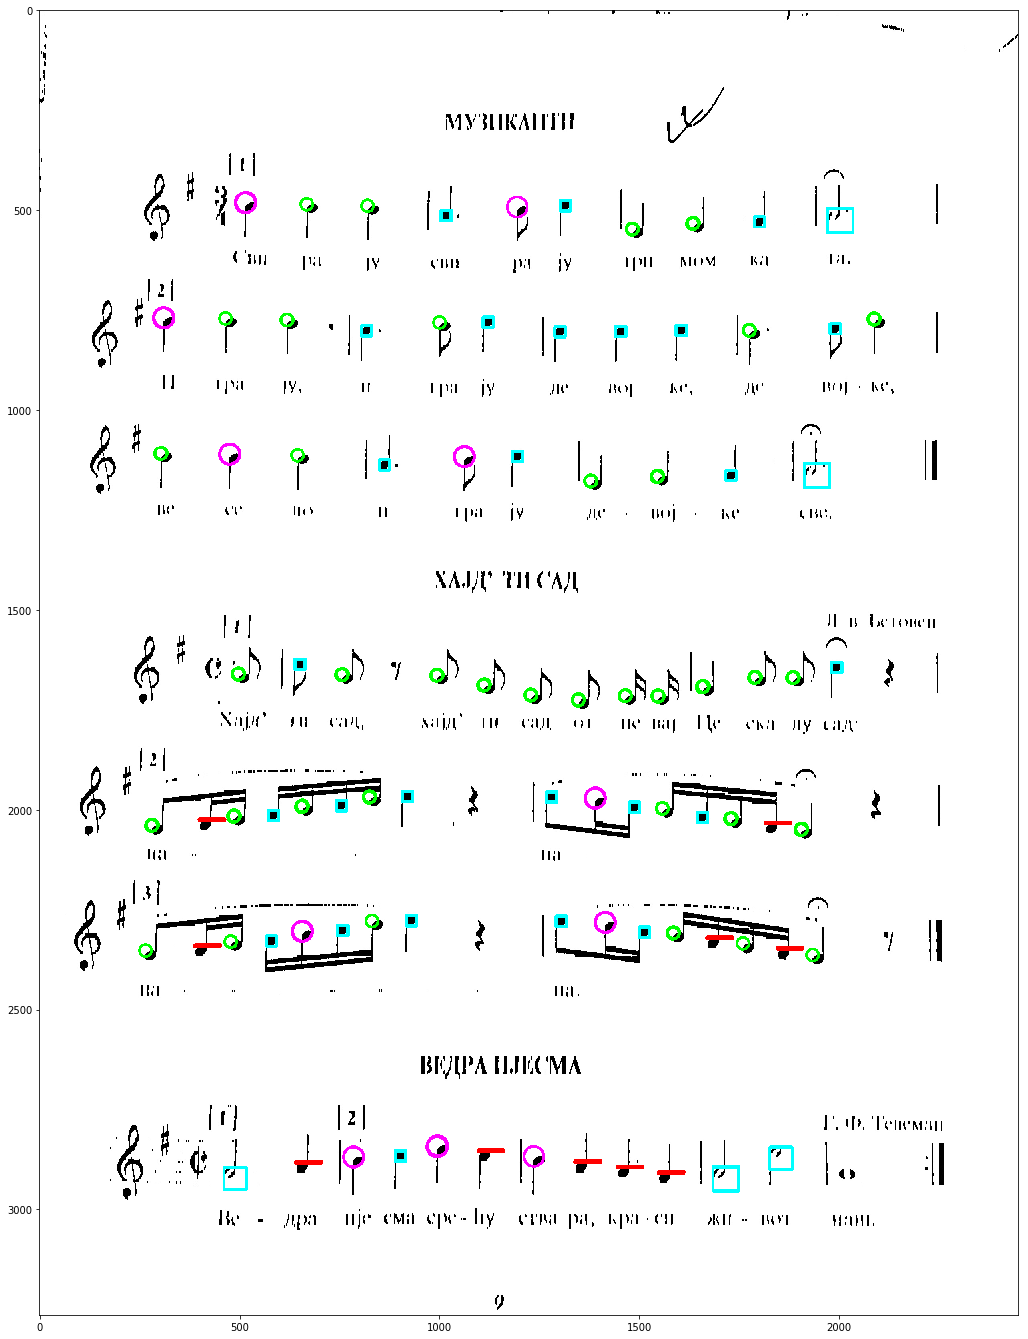

In [23]:
plt.imshow(img_halves_no_full_heads_plot)

In [24]:
print single_templates_dict['half_heads']

{1913: 1133, 1827: 2843, 1971: 495, 462: 2894, 1685: 2892}


# Eight note stems

In [25]:
img_no_full_no_half_heads = img_halves_no_full_heads.copy()
img_no_full_no_half_heads_plot = img_halves_no_full_heads_plot.copy()
#plt.imshow(img_plot_no_full_heads, 'gray')

In [26]:
eight_down_template = cv2.imread('../slike/bez-linija/osmina-dole.jpg',0)
#plt.imshow(template, 'gray')
w, h = eight_down_template.shape[::-1]

res = cv2.matchTemplate(img_stems, eight_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [27]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_stems_down'], point)
    cv2.rectangle(img_no_full_no_half_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_full_no_half_heads_plot, point, (point[0] + w * 2, point[1] + h / 3), (0,255,255), 5)

In [28]:
eight_up_template = cv2.imread('../slike/bez-linija/osmina-gore.jpg',0)
w, h = eight_up_template.shape[::-1]

res = cv2.matchTemplate(img_stems, eight_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [29]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_stems_up'], point)
    cv2.rectangle(img_no_full_no_half_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_full_no_half_heads_plot, point, (point[0] + w * 2, point[1] + h / 3), (0,255,255), 5)

In [30]:
#plt.imshow(img_plot_no_full_heads, 'gray')

In [31]:
#plt.imshow(img_no_full_heads, 'gray')

In [32]:
print len(single_templates_dict['eight_stems_up'])
print len(single_templates_dict['eight_stems_down'])

8
5


# Sixteenth note stems

In [33]:
sixteen_up_template = cv2.imread('../slike/bez-linija/sesnaestina-gore.jpg',0)
#plt.imshow(template, 'gray')
w, h = sixteen_up_template.shape[::-1]

res = cv2.matchTemplate(img_stems, sixteen_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [34]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['sixteen_stems_up'], point)
    cv2.rectangle(img_no_full_no_half_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_full_no_half_heads_plot, point, (point[0] + w * 2, point[1] + h / 3), (0,255,255), 5)

In [35]:
sixteen_down_template = cv2.imread('../slike/bez-linija/sesnaestina-dole.jpg',0)
w, h = sixteen_down_template.shape[::-1]

res = cv2.matchTemplate(img_stems, sixteen_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [36]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['sixteen_stems_down'], point)
    cv2.rectangle(img_no_full_no_half_heads, (point[0] + 11, point[1] + 9), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_full_no_half_heads_plot, point, (point[0] + w * 2, point[1] + h / 3), (0,255,255), 5)

In [37]:
print len(single_templates_dict['sixteen_stems_up'])
print len(single_templates_dict['sixteen_stems_down'])

2
0


# Heads + stems

In [38]:
def search_around_template_point_up(point, templates_dict, search_points = 18, print_info = True):
    '''Searchs for a specific template around certain point of a specific template. 
    
    Example: Searches for eight stems around full note head
    :param point: point around which we search for a template from the templates_dict
    :param templates_dict: dictionary of templates to be searched through
    '''
    
    for i in range(0, search_points):
        if (templates_dict.has_key(point[0] + full_head_template_w + i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] + full_head_template_w + i] == point[1] - eight_stem_up_template_h + j):
                    if print_info:
                        cv2.rectangle(img_no_full_no_half_heads_plot,
                                      (point[0] + full_head_template_w, point[1] - eight_stem_up_template_h),
                                      (point[0] + full_head_template_w + 200, point[1] - eight_stem_up_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_full_no_half_heads_plot, (point[0] + full_head_template_w + i, point[1] - eight_stem_up_template_h + j), 10, (255,0,0), 10)
                    return True
                if (templates_dict[point[0] + full_head_template_w + i] == point[1] - eight_stem_up_template_h - j):
                    if print_info:
                        cv2.rectangle(img_no_full_no_half_heads_plot,
                                      (point[0] + full_head_template_w, point[1] - eight_stem_up_template_h),
                                      (point[0] + full_head_template_w + 200, point[1] - eight_stem_up_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_full_no_half_heads_plot, (point[0] + full_head_template_w + i, point[1] - eight_stem_up_template_h - j), 10, (255,0,0), 10)
                    return True
        if (templates_dict.has_key(point[0] + full_head_template_w - i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] + full_head_template_w - i] == point[1] - eight_stem_up_template_h + j):
                    if print_info:
                        cv2.rectangle(img_no_full_no_half_heads_plot,
                                      (point[0] + full_head_template_w, point[1] - eight_stem_up_template_h),
                                      (point[0] + full_head_template_w + 200, point[1] - eight_stem_up_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_full_no_half_heads_plot, (point[0] + full_head_template_w - i, point[1] - eight_stem_up_template_h + j), 10, (255,0,0), 10)
                    return True
                if (templates_dict[point[0] + full_head_template_w - i] == point[1] - eight_stem_up_template_h - j):
                    if print_info:
                        cv2.rectangle(img_no_full_no_half_heads_plot,
                                      (point[0] + full_head_template_w, point[1] - eight_stem_up_template_h),
                                      (point[0] + full_head_template_w + 200, point[1] - eight_stem_up_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_full_no_half_heads_plot, (point[0] + full_head_template_w - i, point[1] - eight_stem_up_template_h - j), 10, (255,0,0), 10)
                    return True
    
    return False

In [39]:
for head_x, head_y in single_templates_dict['full_heads'].items(): # for each note head found
    #for eight_stem_x, eight_stem_y in : # check if there is an eight stem near the note head
    if (search_around_template_point_up((head_x, head_y), single_templates_dict['eight_stems_up'])):
        all_notes_dict['eights_up'][head_x] = head_y
    if (search_around_template_point_up((head_x, head_y), single_templates_dict['sixteen_stems_up'])):
        all_notes_dict['sixteens_up'][head_x] = head_y

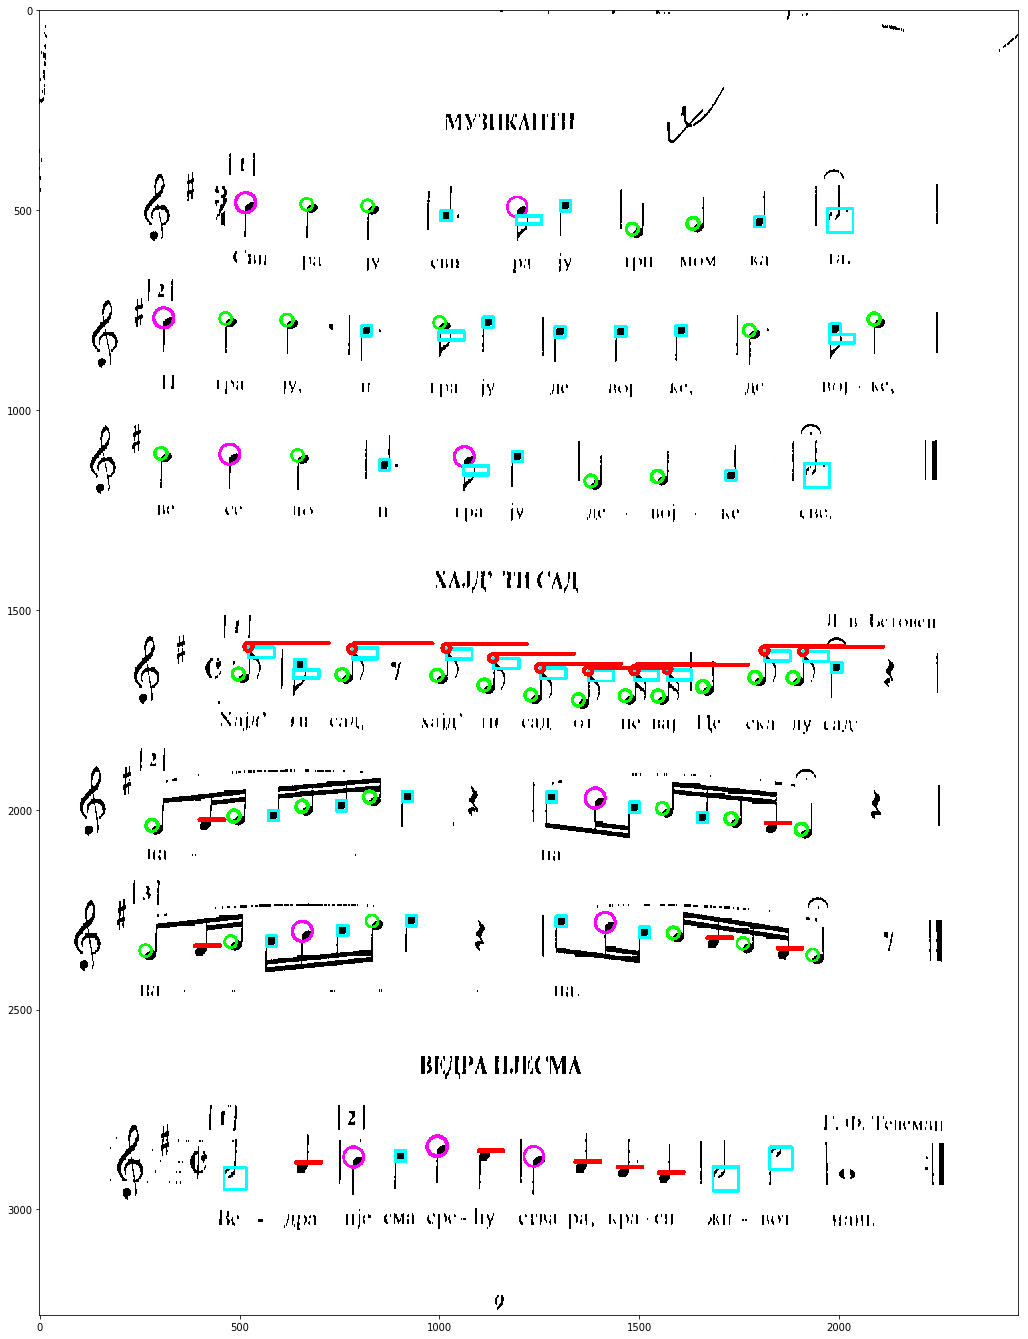

In [40]:
plt.imshow(img_no_full_no_half_heads_plot, 'gray')

In [41]:
print len(all_notes_dict['eights_up'])
print len(all_notes_dict['sixteens_up'])

8
2


# Stems down

In [42]:
def search_around_template_point_down(point, templates_dict, search_points = 18, print_info = True):
    '''Searchs for a specific template around certain point of a specific template. 
    
    Example: Searches for eight stems around full note head
    :param point: point around which we search for a template from the templates_dict
    :param templates_dict: dictionary of templates to be searched through
    '''
    
    for i in range(0, search_points):
        if (templates_dict.has_key(point[0] + i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] + i] == point[1] + full_head_template_h + j):
                    if print_info:
                        cv2.rectangle(img_no_full_no_half_heads_plot,
                                      (point[0], point[1] + full_head_template_h),
                                      (point[0] + 200, point[1] + full_head_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_full_no_half_heads_plot, (point[0] + i, point[1] + full_head_template_h + j), 10, (255,0,0), 10)
                    return True
                if (templates_dict[point[0] + i] == point[1] + full_head_template_h - j):
                    if print_info:
                        cv2.rectangle(img_no_full_no_half_heads_plot,
                                      (point[0], point[1] + full_head_template_h),
                                      (point[0] + 200, point[1] + full_head_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_full_no_half_heads_plot, (point[0] + i, point[1] + full_head_template_h - j), 10, (255,0,0), 10)
                    return True
        if (templates_dict.has_key(point[0] - i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] - i] == point[1] + full_head_template_h + j):
                    if print_info:
                        cv2.rectangle(img_no_full_no_half_heads_plot,
                                      (point[0], point[1] + full_head_template_h),
                                      (point[0] + 200, point[1] + full_head_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_full_no_half_heads_plot, (point[0] - i, point[1] + full_head_template_h + j), 10, (255,0,0), 10)
                    return True
                if (templates_dict[point[0] - i] == point[1] + full_head_template_h - j):
                    if print_info:
                        cv2.rectangle(img_no_full_no_half_heads_plot,
                                      (point[0], point[1] + full_head_template_h),
                                      (point[0] + 200, point[1] + full_head_template_h + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_no_full_no_half_heads_plot, (point[0] - i, point[1] + full_head_template_h - j), 10, (255,0,0), 10)
                    return True
    
    return False

In [43]:
for head_x, head_y in single_templates_dict['full_heads'].items(): # for each note head found
    #for eight_stem_x, eight_stem_y in : # check if there is an eight stem near the note head
    if (search_around_template_point_down((head_x, head_y), single_templates_dict['eight_stems_down'])):
        all_notes_dict['eights_down'][head_x] = head_y
    if (search_around_template_point_down((head_x, head_y), single_templates_dict['sixteen_stems_down'])):
        all_notes_dict['sixteens_down'][head_x] = head_y

In [44]:
print len(all_notes_dict['eights_down'])
print len(all_notes_dict['sixteens_down'])

5
0


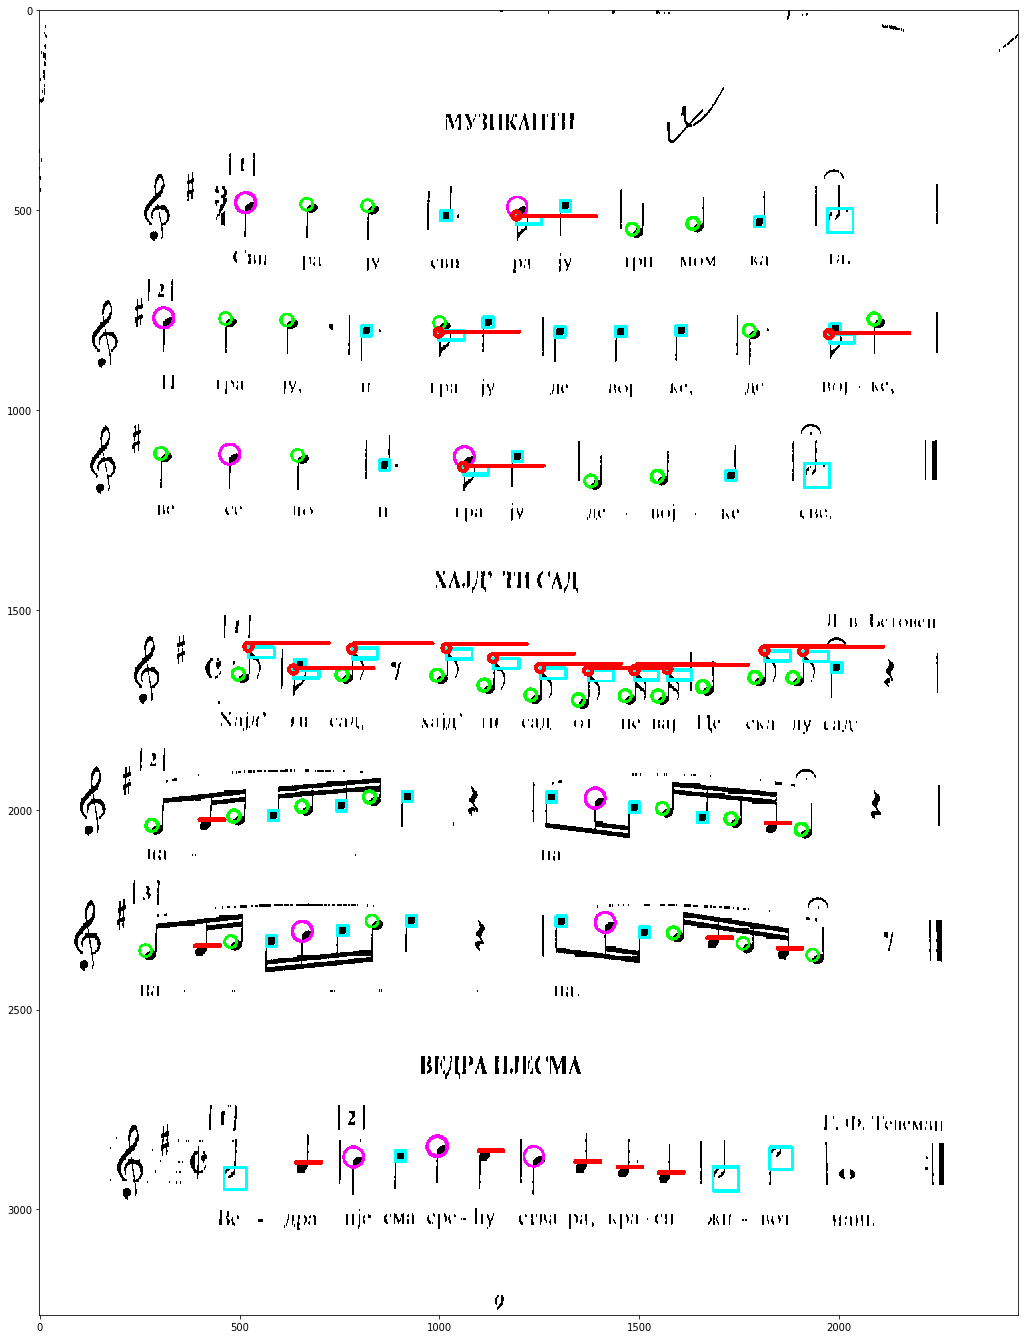

In [45]:
plt.imshow(img_no_full_no_half_heads_plot, 'gray')

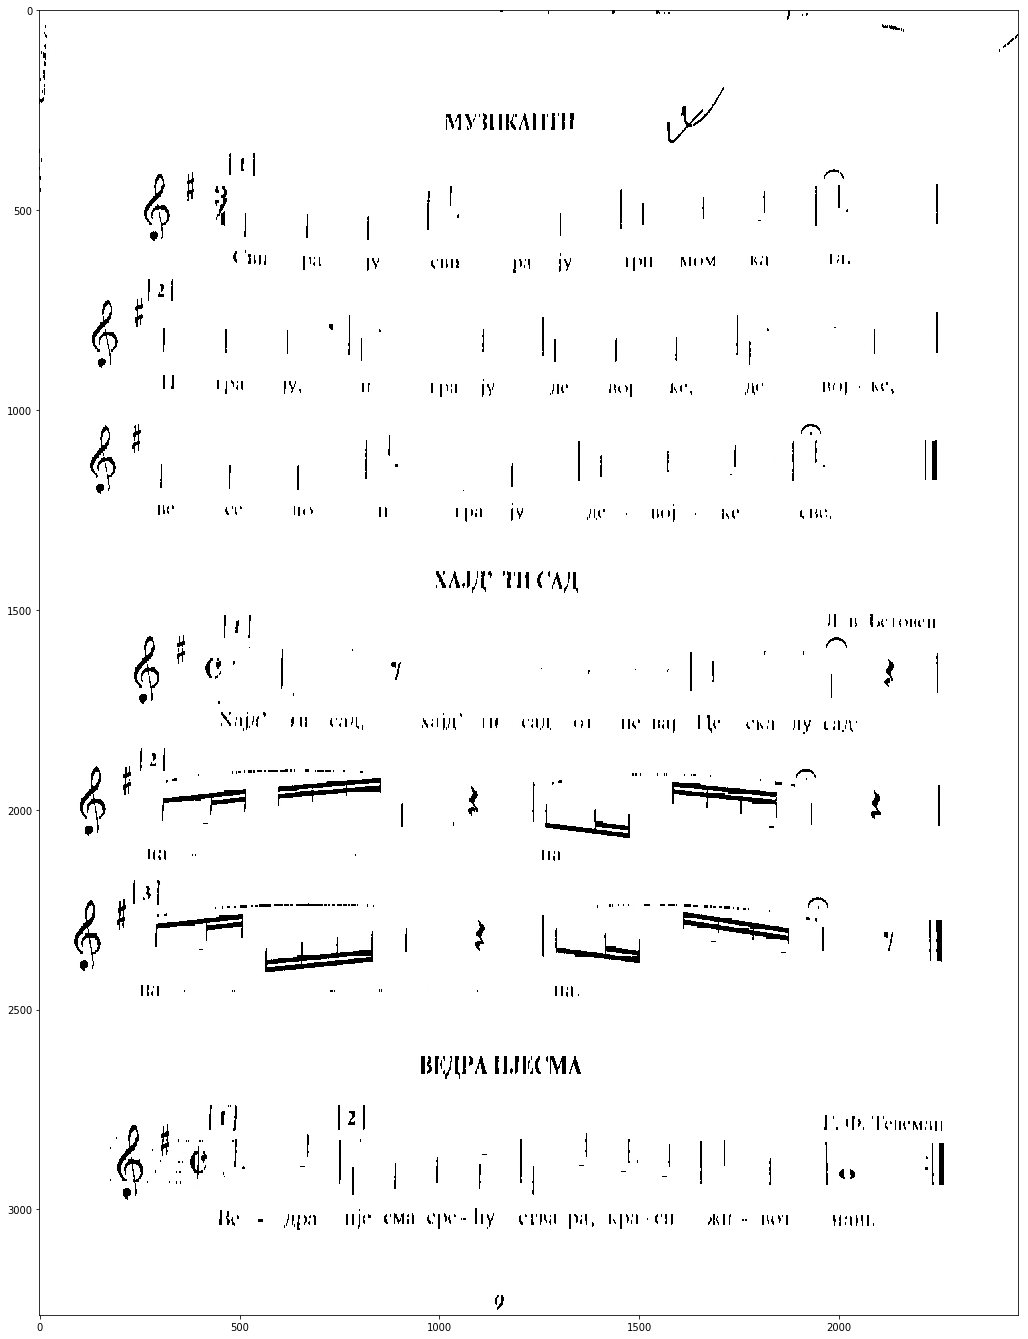

In [46]:
plt.imshow(img_no_full_no_half_heads, 'gray')

# Hooks

In [47]:
img_no_heads_no_stems = img_no_full_no_half_heads.copy()
img_no_heads_no_stems_plot = img_no_full_no_half_heads_plot.copy()

In [48]:
threshold = 0.85
single_templates_dict['eight_hooks_down_start'] = {}
single_templates_dict['eight_hooks_up_start'] = {}
single_templates_dict['eight_hooks_down_continue'] = {}
single_templates_dict['eight_hooks_up_continue'] = {}
single_templates_dict['eight_hooks_down_end'] = {}
single_templates_dict['eight_hooks_up_end'] = {}

In [49]:
hook_start_eight_down_template = cv2.imread('../slike/bez-linija/kuka-pocetak-osmina-dole.jpg',0)
w, h = hook_start_eight_down_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_down_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [50]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_down_start'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (100,155,155), 5)

In [51]:
hook_start_eight_up_template = cv2.imread('../slike/bez-linija/kuka-pocetak-osmina-gore.jpg',0)
w, h = hook_start_eight_up_template.shape[::-1]

res = cv2.matchTemplate(img_no_heads_no_stems, hook_start_eight_up_template, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [52]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['eight_hooks_up_start'], point)
    cv2.rectangle(img_no_heads_no_stems, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.rectangle(img_no_heads_no_stems_plot, point, (point[0] + w * 2, point[1] + h), (100,155,155), 5)

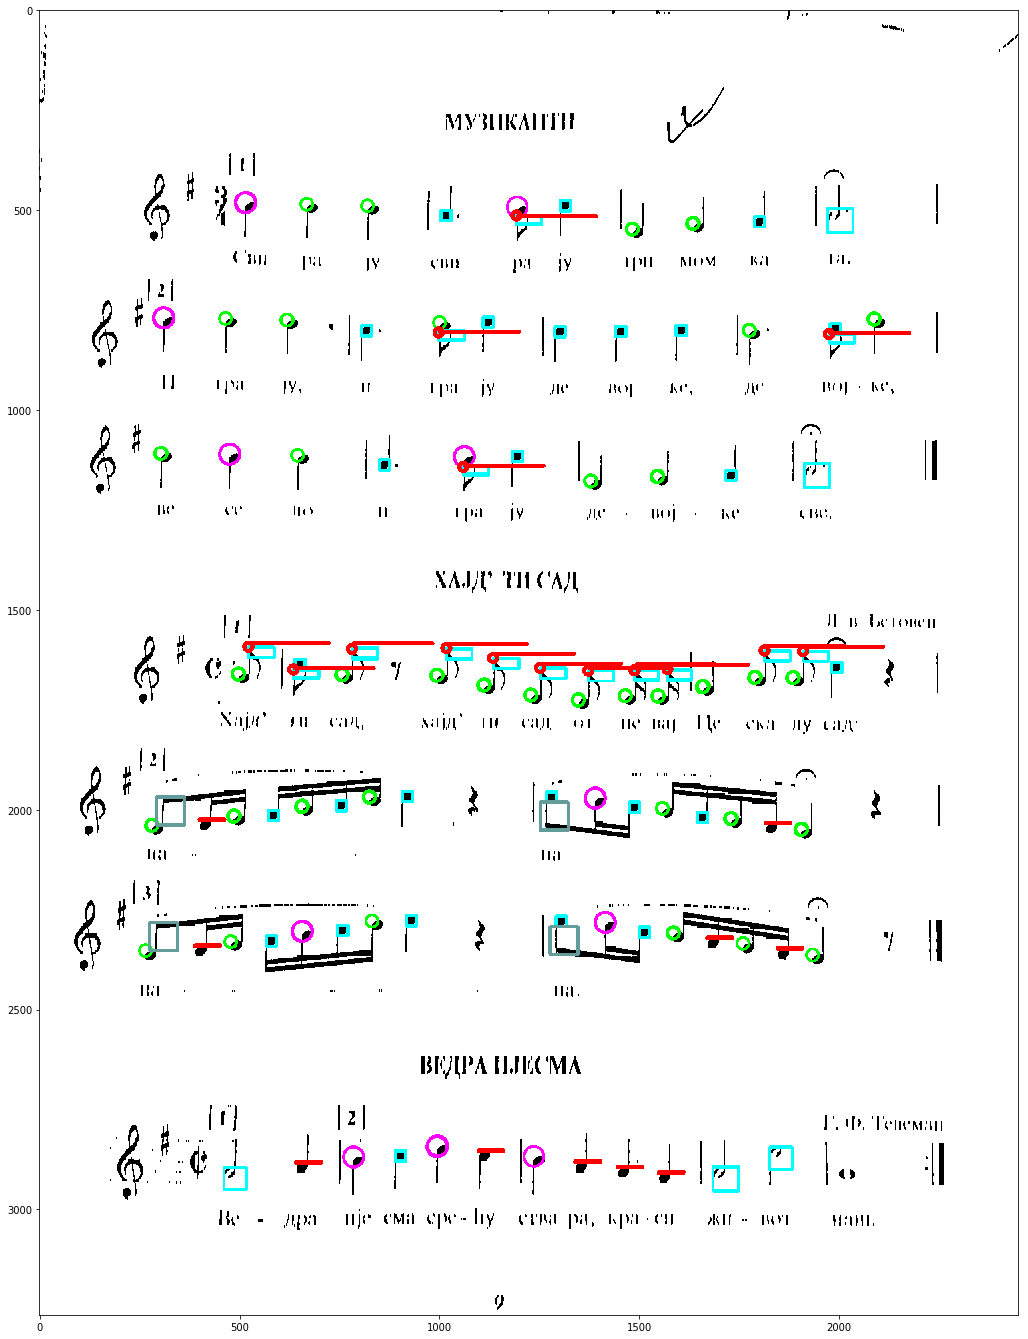

In [53]:
plt.imshow(img_no_heads_no_stems_plot)

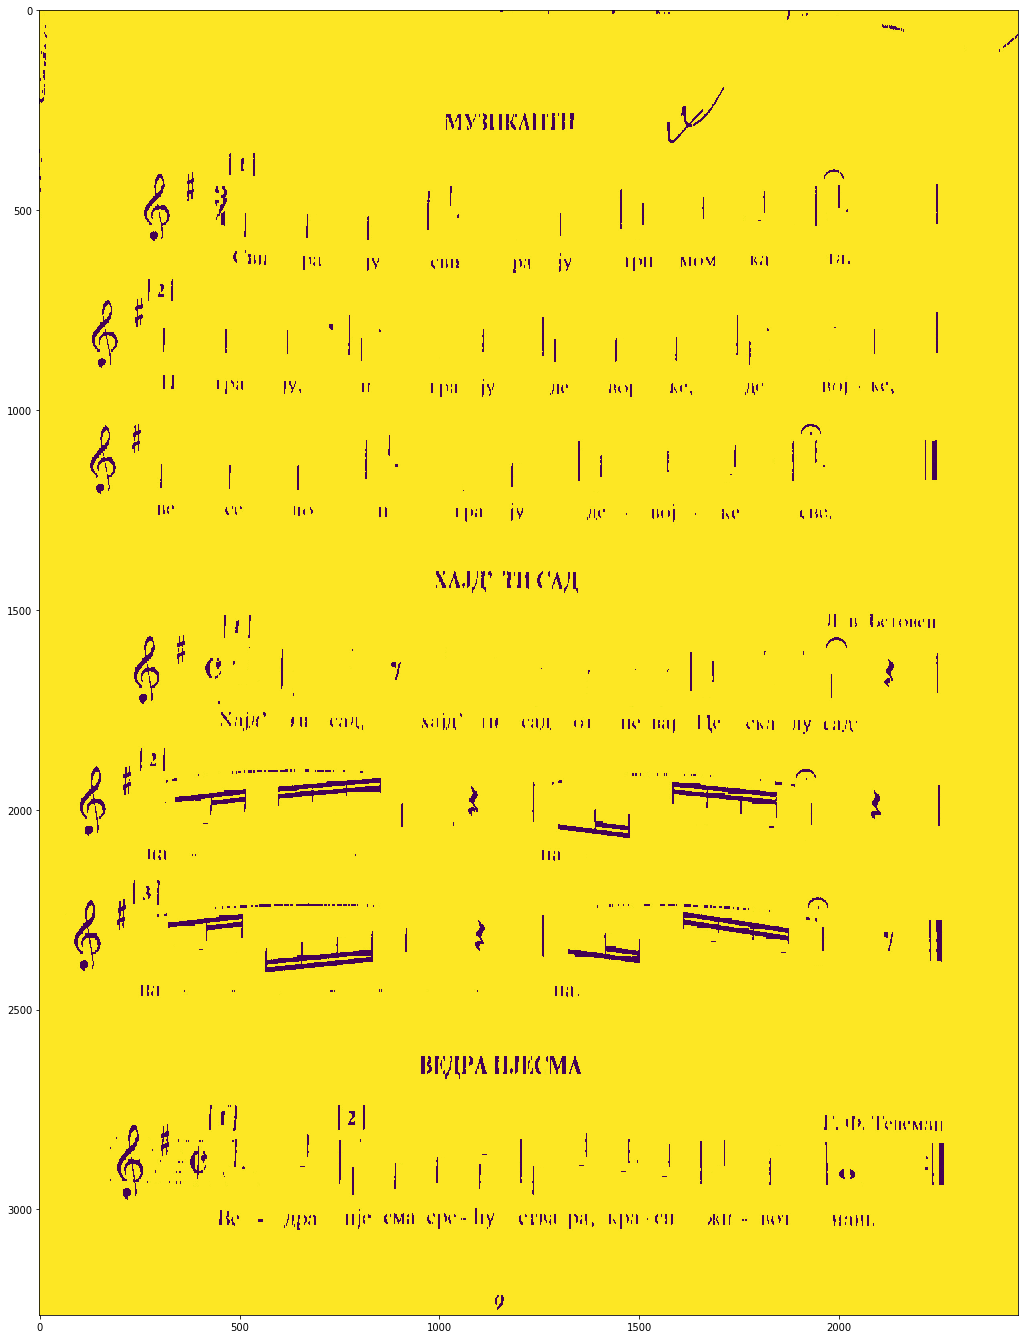

In [54]:
plt.imshow(img_no_heads_no_stems)

In [55]:
print 'eight hooks which start up:  ', len(single_templates_dict['eight_hooks_up_start'])
print 'eight hooks which start down:', len(single_templates_dict['eight_hooks_down_start'])

eight hooks which start up:   2
eight hooks which start down: 2


# Dots

In [56]:
img_dots = img_no_full_no_half_heads.copy()
img_dots_plot = img_no_full_no_half_heads_plot.copy()
threshold = 0.85
#single_templates_dict['dot'] = {}

In [57]:
dot_template_1 = cv2.imread('../slike/bez-linija/tacka-1.jpg',0)
#asd, dot_template_1 = cv2.threshold(dot_template_1, 100, 255, cv2.THRESH_BINARY)
#plt.imshow(dot_template_1)
w, h = dot_template_1.shape[::-1]

res = cv2.matchTemplate(img_dots, dot_template_1, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [58]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['dot'], point)
    cv2.rectangle(img_dots, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.circle(img_dots_plot, point, 30, (100,155,155), 15)

In [59]:
dot_template_2 = cv2.imread('../slike/bez-linija/tacka-2.jpg',0)
#asd, dot_template_2 = cv2.threshold(dot_template, 100, 255, cv2.THRESH_BINARY)
#plt.imshow(dot_template_2)
w, h = dot_template_2.shape[::-1]

res = cv2.matchTemplate(img_dots, dot_template_2, cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [60]:
for point in zip(*loc[::-1]):
    add_template(single_templates_dict['dot'], point)
    cv2.rectangle(img_dots, (point[0] + 11, point[1]), (point[0] + w, point[1] + h - 7), (255,255,255), 20)
    cv2.circle(img_dots_plot, point, 30, (100,155,155), 15)

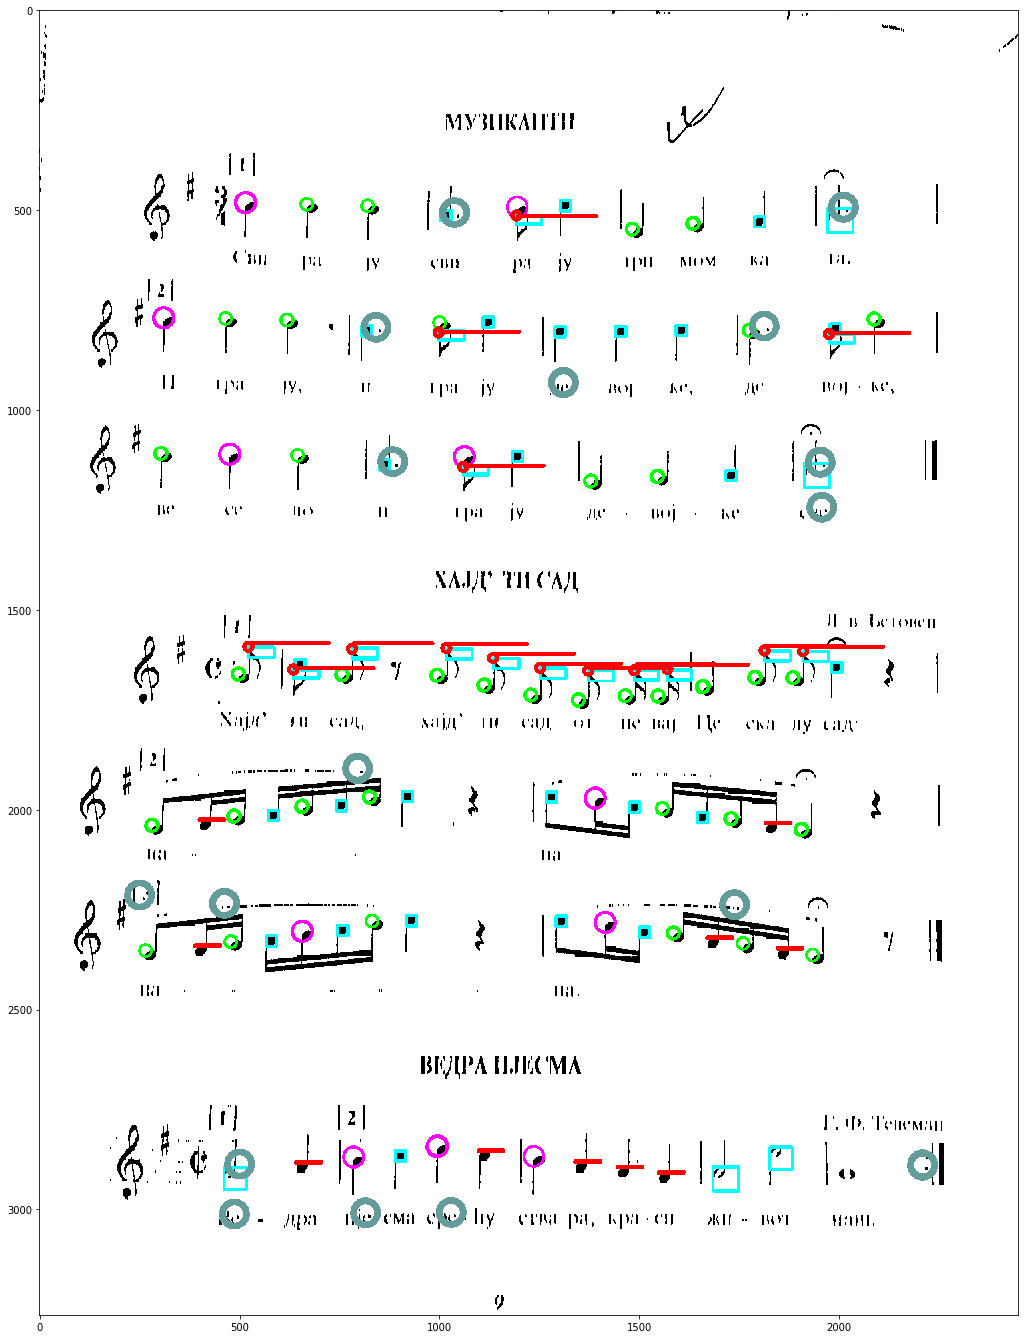

In [61]:
plt.imshow(img_dots_plot)

In [62]:
print len(single_templates_dict['dot'])

17


# Notes + dots

In [63]:
def find_note_for_dot(point, templates_dict, template_width, search_points = 18, print_info = True):
    '''Searchs for a specific head template around certain dot. 
    
    Example: Searches for a full head note before a dot on point :param point:
    :param point: point around which we search for a note head from the templates_dict
    :param templates_dict: dictionary of templates to be searched through
    '''
    
    dot_head_min_distance = 5  # the dot has at least this much pixels to the left before it reaches a note head
    
    for i in range(0, search_points):
        if (templates_dict.has_key(point[0] - template_width - dot_head_min_distance + i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] - template_width - dot_head_min_distance + i] == point[1] + j):
                    if print_info:
                        cv2.rectangle(img_dots_plot,
                                      (point[0], point[1]),
                                      (point[0] + 200, point[1] + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_dots_plot, (point[0] + i, point[1] + j), 10, (255,0,0), 10)
                    return True
                if (templates_dict[point[0] - template_width - dot_head_min_distance + i] == point[1] - j):
                    if print_info:
                        cv2.rectangle(img_dots_plot,
                                      (point[0], point[1]),
                                      (point[0] + 200, point[1] + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_dots_plot, (point[0] + i, point[1] - j), 10, (255,0,0), 10)
                    return True
        if (templates_dict.has_key(point[0] - template_width - dot_head_min_distance - i)):
            for j in range(0, search_points):
                if (templates_dict[point[0] - template_width - dot_head_min_distance - i] == point[1] + j):
                    if print_info:
                        cv2.rectangle(img_dots_plot,
                                      (point[0], point[1]),
                                      (point[0] + 200, point[1] + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_dots_plot, (point[0] - i, point[1] + j), 10, (255,0,0), 10)
                    return True
                if (templates_dict[point[0] - template_width - dot_head_min_distance - i] == point[1] - j):
                    if print_info:
                        cv2.rectangle(img_dots_plot,
                                      (point[0], point[1]),
                                      (point[0] + 200, point[1] + 3),
                                     (255,0,0), 5)
                        cv2.circle(img_dots_plot, (point[0] - i, point[1] - j), 10, (255,0,0), 10)
                    return True
    
    return False

In [64]:
for dot_x, dot_y in single_templates_dict['dot'].items():
    if (find_note_for_dot((dot_x, dot_y), all_notes_dict['quarters_up'], full_head_template_w) ):
        all_dots_dict['quarters'][dot_x] = dot_y
    if (find_note_for_dot((dot_x, dot_y), all_notes_dict['quarters_down'], full_head_template_w) ):
        all_dots_dict['quarters'][dot_x] = dot_y

In [65]:
print len(all_dots_dict['quarters'])

0
